This simple notebook demonstrates how users can interleave text, code, and results in a single document. We start with a simple calculation -- computing the first 25 numbers in the Fibonacci sequence, where each value equals the sum of the two previous values. The Jupyter notebook allows us to express that mathematically, using the typesetting language $\LaTeX{}$: $$F_n = F_{n-1} + F_{n-2}$$
Thus, the sequence is: 0, 1, 1, 2, 3, 5, 8, ...

The first cell contains an IPython 'magic' code, '%matplotlib', which allows the notebook to display plots inline, in the body of the notebook.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
# calculate the first 25 Fibonacci numbers
f1 = 0
f2 = 1
ar = [f1, f2] # a list to hold the computed values. We know the first two numbers

# we only need to run our calculation 23 times, because positions 1 and 2 are known
for i in range (23):
    f3 = f1 + f2
    ar.append (f3)
    f1 = f2
    f2 = f3
    
print (ar) # below, you see the output of the code itself.

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]


Plot the data

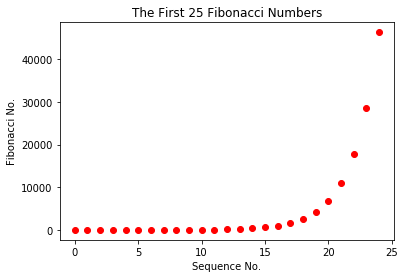

In [4]:
fig, ax = plt.subplots()
ax.plot (range(25), ar, "ro")
## uncomment the following call to ax.plot() (by removing the leading '#') and select 
## 'Cell > Run All' (in Binder) or 'Run > Run All Cells' (Jupyter) to change the graph below
# ax.plot (range(25), ar)
ax.set (xlabel = "Sequence No.", ylabel = "Fibonacci No.", 
       title = "The First 25 Fibonacci Numbers")
plt.show()

Anything you can do programmatically, can be documented in a notebook. Here we'll do some simple sequence analysis with Biopython. The following example is adapted from the [Biopython tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html). 

**Uncomment the following cell (by deleting the leading `#`) if you don't have biopython installed.**

In [5]:
# !pip install biopython

First, we'll read in a Genbank-formatted file, which represents a circular DNA, called a plasmid, from the bacterium, *Yersinia pestis*. 

In [6]:
from Bio import SeqIO

record = SeqIO.read("NC_005816.gb", "genbank")
record.seq

Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG', IUPACAmbiguousDNA())

How long is the DNA, and how which genes does it encode?

In [7]:
print("Length:", len(record.seq), "bp")
print("No. features:",len(record.features),"\n")

nFeatures = 0
for feat in record.features:
    if (feat.type == "CDS"):
        product = feat.qualifiers['product'][0]
        print ("Feat. %d: %s" % (nFeatures, product))
    nFeatures += 1

Length: 9609 bp
No. features: 41 

Feat. 3: putative transposase
Feat. 8: transposase/IS protein
Feat. 15: putative replication regulatory protein
Feat. 18: hypothetical protein
Feat. 21: pesticin immunity protein
Feat. 23: pesticin
Feat. 29: hypothetical protein
Feat. 32: outer membrane protease
Feat. 35: putative transcriptional regulator
Feat. 38: hypothetical protein


This plasmid encodes 41 features, including 10 genes. Let's focus on feature #18, which encodes a 'hypothetical protein'.

In [8]:
feat = record.features[18]
print ("Gene location\nStart:", feat.location.start, "\nEnd:", feat.location.end)
print ("GeneID:", feat.qualifiers.get("db_xref"))

Gene location
Start: 3485 
End: 3857
GeneID: ['GI:45478715', 'GeneID:2767720']


These data show us that the gene is located between bases 3485 and 3857. Let's retrieve that segment and translate it.

In [9]:
my_gene = record[3485:3857]
print (my_gene.seq.translate(table="Bacterial"))

VSKKRRPQKRPRRRRFFHRLRPPDEHHKNRRSSQRWRNPTGLKDTRRFPPEAPSCALLFRPCRLPDTSPPFSLREAWRFLIAHAVGISVRCRSFAPSWAVCTNPPFSPTTAPYPVTIVLSPTR*


Now, let's find out more about this gene, using the NCBI Entrez database. We learned the accession number above: `GeneID: ['GI:45478715', 'GeneID:2767720']`.

In [10]:
from Bio import Entrez

In [11]:
Entrez.email = "A.N.Other@example.com"  # Always tell NCBI who you are
handle = Entrez.efetch (db="nucleotide",id="45478715",rettype="gb",retmode="text")
print (handle.read())

LOCUS       NP_995570                123 aa            linear   CON 16-DEC-2014
DEFINITION  hypothetical protein YP_pPCP04 (plasmid) [Yersinia pestis biovar
            Microtus str. 91001].
ACCESSION   NP_995570
VERSION     NP_995570.1
DBLINK      BioProject: PRJNA58037
DBSOURCE    REFSEQ: accession NC_005816.1
KEYWORDS    RefSeq.
SOURCE      Yersinia pestis biovar Microtus str. 91001
  ORGANISM  Yersinia pestis biovar Microtus str. 91001
            Bacteria; Proteobacteria; Gammaproteobacteria; Enterobacteriales;
            Enterobacteriaceae; Yersinia.
REFERENCE   1  (residues 1 to 123)
  AUTHORS   Zhou,D., Tong,Z., Song,Y., Han,Y., Pei,D., Pang,X., Zhai,J., Li,M.,
            Cui,B., Qi,Z., Jin,L., Dai,R., Du,Z., Wang,J., Guo,Z., Wang,J.,
            Huang,P. and Yang,R.
  TITLE     Genetics of metabolic variations between Yersinia pestis biovars
            and the proposal of a new biovar, microtus
  JOURNAL   J. Bacteriol. 186 (15), 5147-5152 (2004)
   PUBMED   15262951
REFERE

Jupyter also supports interactive data exploration. Here we'll add an interactive map, just as in our June [mapping feature](https://www.nature.com/articles/d41586-018-05331-6) -- something you might do when working with geospatial data. This requires the Python Leaflet library, folium. (**Uncomment the following cell (by deleting the leading `#`) if you don't have folium installed.**)

In [12]:
# !pip install folium

In [13]:
import folium

Now we create a simple map: a few points in London, Oxford and Cambridge, overlaid on either a street map, or on a map of geological data provided by the [Macrostrat Project](https://macrostrat.org/). 

In [14]:
coords = { 
    0: { "name": "Nature", "lat": 51.533925, "long": -0.121553 },
    1: { "name": "Francis Crick Institite", "lat": 51.531877, "long": -0.128767 },
    2: { "name": "MRC Laboratory for Molecular Cell Biology", "lat": 51.524435, "long": -0.132495 },
    3: { "name": "Kings College London", "lat": 51.511573, "long": -0.116083 },
    4: { "name": "Imperial College London", "lat": 51.498780, "long": -0.174888 },
    5: { "name": "Cambridge University", "lat": 52.206960, "long": 0.115034 },
    6: { "name": "Oxford University", "lat": 51.754843, "long": -1.254302 },
    7: { "name": "Platform 9 3/4", "lat": 51.532349, "long": -0.123806 }
}

In [15]:
m = folium.Map(location = [51.8561, -0.2966], tiles = 'CartoDB positron', zoom_start = 9)

# add the locations to the map
for key in coords.keys():
    folium.CircleMarker(
    location=[coords[key]['lat'], coords[key]['long']],
    popup=coords[key]['name'],
    color=('crimson' if coords[key]['name'] == 'Nature' else 'blue'),
    fill=False,
    ).add_to(m)

# pull in the Macrostrat tile layer
folium.TileLayer(tiles='https://tiles.macrostrat.org/carto/{z}/{x}/{y}.png', 
                 attr='Macrostrat', name='Macrostrat').add_to(m)
folium.LayerControl().add_to(m) # allow user to switch between layers
folium.LatLngPopup().add_to(m) # click on the map to get Lat/Long in a popup

Draw the map. **Note that this map is interactive**: you can zoom, pan, click the points of interest, and alternate between the two layers (by clicking on the tiles icon in the upper-right corner of the map). If you click anywhere on the map, a popup will appear showing the latitude and longitude of that position.

In [16]:
m

Document our session, for [computational reproducibility](https://www.nature.com/articles/d41586-018-05990-5)!

In [17]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'dd83a2163',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/anaconda3/lib/python3.6/site-packages/IPython',
 'ipython_version': '6.5.0',
 'os_name': 'posix',
 'platform': 'Darwin-17.7.0-x86_64-i386-64bit',
 'sys_executable': '/anaconda3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.6.6 | packaged by conda-forge | (default, Jul 26 2018, '
                '09:55:02) \n'
                '[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]'}


In [18]:
!pip freeze | grep -E 'folium|matplotlib|biopython'

biopython==1.70
folium==0.6.0
matplotlib==2.2.3
